In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("gym_crowdedness.csv")
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [4]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [6]:
for col in df.columns:
    print(f"{col} = ",df[col].unique())

number_people =  [ 37  45  40  44  46  43  53  54  39  38  41  36  42  35  48  49  33  22
   2   1   0   3   6  15  18  21  26  23  28  30  32  29  34  27  31  25
  24  12  17   4  11  16  20  19  14   9  13  50  47  55  68  58  65  63
  74  69  60  73  52  66  64   7  10  61  51  62  56  71  72  67   5  70
  57  59   8  75 134 139 119 145 105  93 115 108 111 102  98  89  78  83
  84  77  80  81  87  88  92  76  82  79 104  96  91  94  86  90  85  95
 101 100 106 103 110 117 114 118  97  99 109 107 124 112 113 116 123 121
 125 138]
date =  ['2015-08-14 17:00:11-07:00' '2015-08-14 17:20:14-07:00'
 '2015-08-14 17:30:15-07:00' ... '2017-03-18 19:02:40-07:00'
 '2017-03-18 19:12:47-07:00' '2017-03-18 19:22:51-07:00']
timestamp =  [61211 62414 63015 ... 66141 67348 69771]
day_of_week =  [4 5 6 0 1 2 3]
is_weekend =  [0 1]
is_holiday =  [0 1]
temperature =  [71.76 72.15 69.97 ... 54.98 51.75 56.71]
is_start_of_semester =  [0 1]
is_during_semester =  [0 1]
month =  [ 8  9 10 11 12  1  2  3  4 

In [7]:
df["date"] = pd.to_datetime(df["date"],utc=True)

In [8]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-15 00:00:11+00:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-15 00:20:14+00:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-15 00:30:15+00:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-15 00:40:16+00:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-15 00:50:17+00:00,64217,4,0,0,71.76,0,0,8,17


In [9]:
df["year"] = df["date"].dt.year
#df["month"] = df["date"].dt.month
#df["day"] = df["date"].dt.day
#df["hour"] = df["date"].dt.hour

In [10]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
0,37,2015-08-15 00:00:11+00:00,61211,4,0,0,71.76,0,0,8,17,2015
1,45,2015-08-15 00:20:14+00:00,62414,4,0,0,71.76,0,0,8,17,2015
2,40,2015-08-15 00:30:15+00:00,63015,4,0,0,71.76,0,0,8,17,2015
3,44,2015-08-15 00:40:16+00:00,63616,4,0,0,71.76,0,0,8,17,2015
4,45,2015-08-15 00:50:17+00:00,64217,4,0,0,71.76,0,0,8,17,2015


In [12]:
df.drop("date",axis=1,inplace=True)

In [13]:
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
0,37,61211,4,0,0,71.76,0,0,8,17,2015
1,45,62414,4,0,0,71.76,0,0,8,17,2015
2,40,63015,4,0,0,71.76,0,0,8,17,2015
3,44,63616,4,0,0,71.76,0,0,8,17,2015
4,45,64217,4,0,0,71.76,0,0,8,17,2015


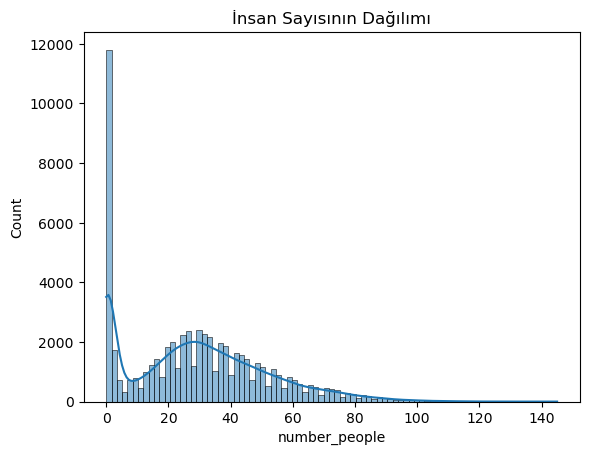

In [18]:
sns.histplot(data=df, x='number_people', kde=True)
plt.title('İnsan Sayısının Dağılımı')
plt.show()

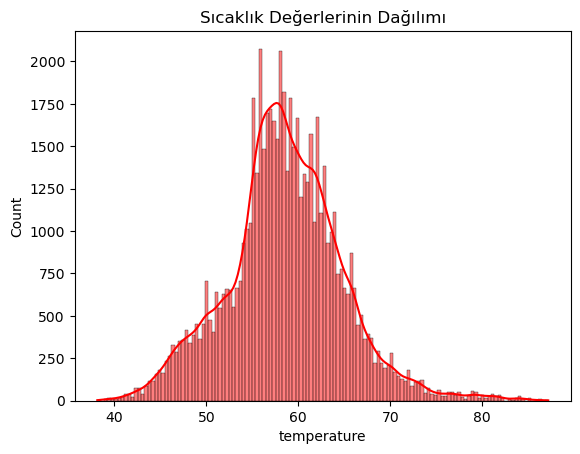

In [19]:
sns.histplot(data=df, x='temperature', kde=True, color='red')
plt.title('Sıcaklık Değerlerinin Dağılımı')
plt.show()

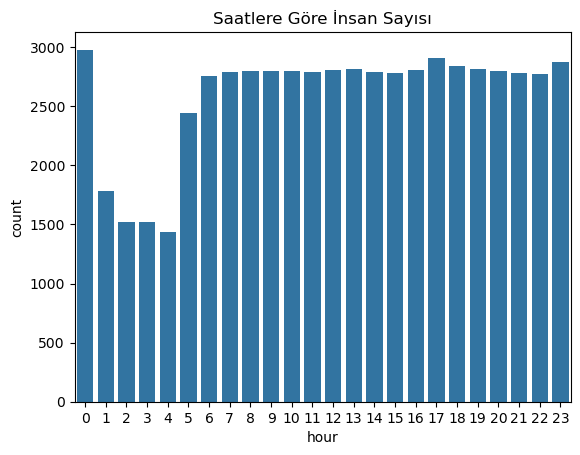

In [22]:
sns.countplot(data=df, x='hour')
plt.title('Saatlere Göre İnsan Sayısı')
plt.show()

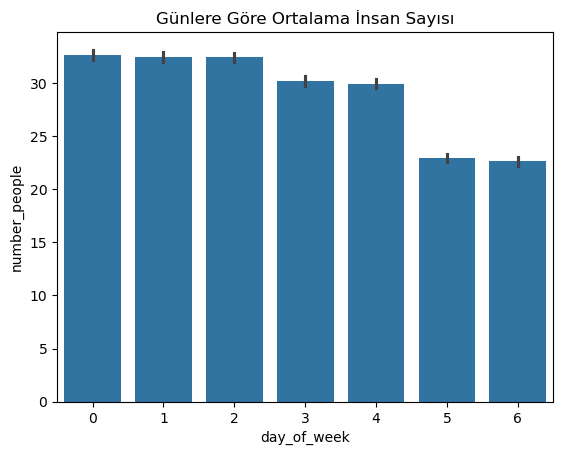

In [23]:
sns.barplot(data=df, x="day_of_week", y="number_people")
plt.title("Günlere Göre Ortalama İnsan Sayısı")
plt.show()

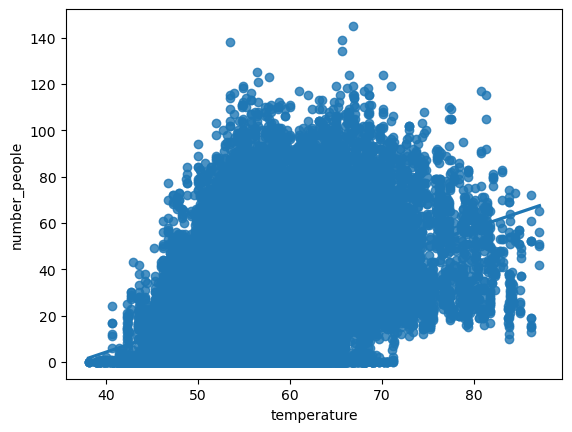

In [24]:
sns.regplot(data=df,x="temperature",y="number_people")
plt.show()

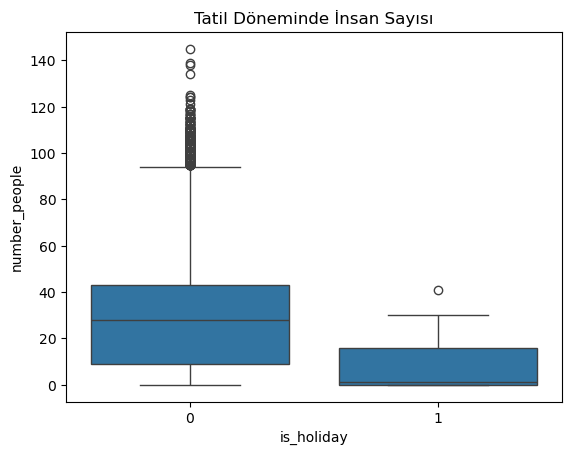

In [25]:
sns.boxplot(data=df,x="is_holiday",y="number_people")
plt.title("Tatil Döneminde İnsan Sayısı")
plt.show()

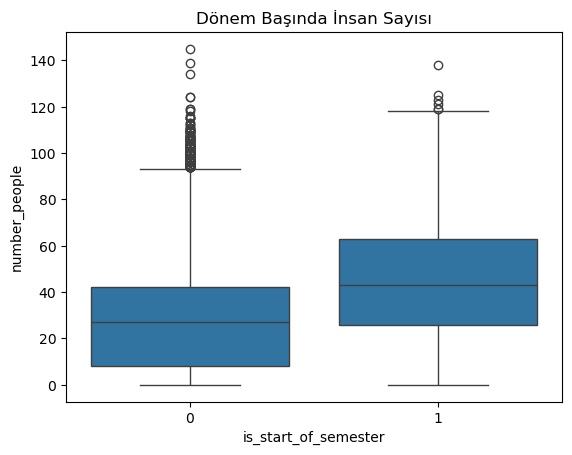

In [28]:
sns.boxplot(data=df,x="is_start_of_semester",y="number_people")
plt.title("Dönem Başında İnsan Sayısı")
plt.show()

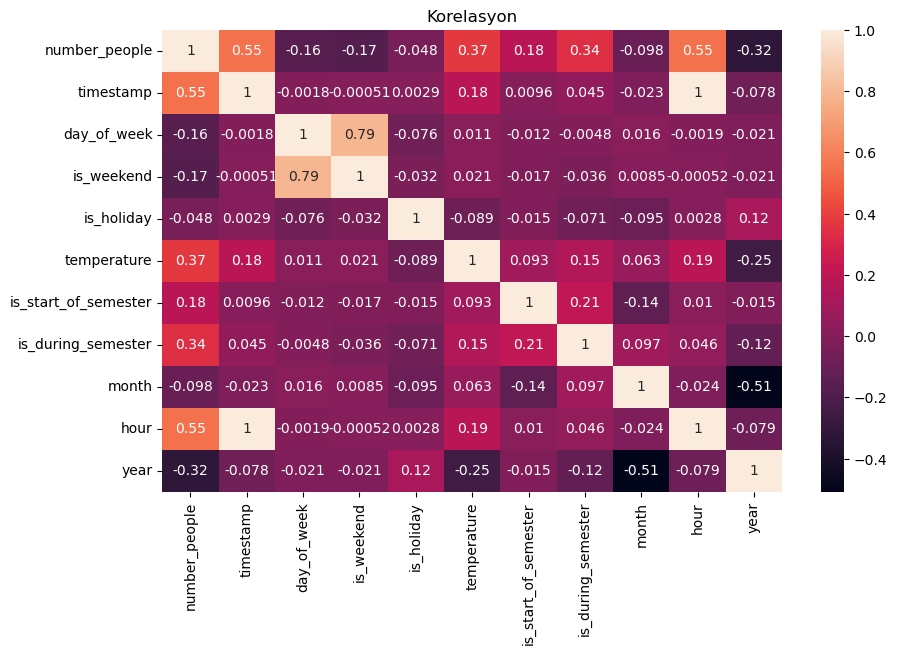

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Korelasyon")
plt.show()

In [39]:
df.drop("timestamp",axis=1,inplace=True)

In [40]:
df.head()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
0,37,4,0,0,71.76,0,0,8,17,2015
1,45,4,0,0,71.76,0,0,8,17,2015
2,40,4,0,0,71.76,0,0,8,17,2015
3,44,4,0,0,71.76,0,0,8,17,2015
4,45,4,0,0,71.76,0,0,8,17,2015


In [41]:
X = df.drop("number_people",axis=1)
y= df["number_people"]

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [45]:
def calculate_model_metrics(true,pred):
    mae = mean_absolute_error(true,pred)
    mse = mean_squared_error(true,pred)
    rmse = np.sqrt(mean_squared_error(true,pred)) # mean_squared_error(true,pred) ** 0.5
    r2 = r2_score(true,pred)
    return mae, mse, rmse, r2

In [55]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regression": KNeighborsRegressor(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor()
}

In [56]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    # overfitting saptamak için y_train_pred alabiliriz. y_train_pred r2 yüksek çıkacaktır fakat
    # y_test_pred r2 arasında çok fazla fark olmamalı
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = calculate_model_metrics(y_train,y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = calculate_model_metrics(y_test,y_test_pred)

    print(f"=== {list(models.keys())[i]} ===")
    print("Evaluation for Training Set")
    print("MAE: ", model_train_mae)
    print("MSE: ", model_train_mse)
    print("RMSE: ", model_train_rmse)
    print("R2 Score: ", model_train_r2)
    print("----------")
    print("Evaluation for Test Set")
    print("MAE: ", model_test_mae)
    print("MSE: ", model_test_mse)
    print("RMSE: ", model_test_rmse)
    print("R2 Score: ", model_test_r2)
    print("\n")

=== Linear Regression ===
Evaluation for Training Set
MAE:  10.733469936454322
MSE:  205.13401794488652
RMSE:  14.322500408269727
R2 Score:  0.5999639521710997
----------
Evaluation for Test Set
MAE:  10.77975237102956
MSE:  208.82079130797558
RMSE:  14.45063290337055
R2 Score:  0.5989271376662775


=== Lasso ===
Evaluation for Training Set
MAE:  10.945189874221992
MSE:  212.259326082103
RMSE:  14.569122351126817
R2 Score:  0.5860687429058037
----------
Evaluation for Test Set
MAE:  10.970594902476911
MSE:  216.19324207171786
RMSE:  14.703511215751082
R2 Score:  0.5847671974050243


=== Ridge ===
Evaluation for Training Set
MAE:  10.733479178820716
MSE:  205.13401810651638
RMSE:  14.322500413912243
R2 Score:  0.5999639518559019
----------
Evaluation for Test Set
MAE:  10.779759559023024
MSE:  208.8208036377029
RMSE:  14.450633329986022
R2 Score:  0.5989271139851153


=== K-Neighbors Regression ===
Evaluation for Training Set
MAE:  3.6452892491101676
MSE:  29.434981774518633
RMSE:  5.42

In [58]:
knn_params = {
    "n_neighbors": [3,4,10,20,50]
}

rf_params = {
    "n_estimators": [200,400,500,1000],
    "max_depth": [5,10,15,None],
    "max_features": ["sqrt","log2",5,10,20],
    "min_samples_split": [5,10,15,20]
}

In [60]:
from sklearn.model_selection import RandomizedSearchCV

randomcv_models = [
    ("KNN", KNeighborsRegressor(), knn_params),
    ("RandomForest", RandomForestRegressor(), rf_params)
]

In [63]:
for name, model, params in randomcv_models:
    rscv = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=5,scoring="accuracy",n_jobs=-1)
    rscv.fit(X_train,y_train)
    print(f"Best Params for {name}: ", rscv.best_params_)

/home/emre/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 5 is smaller than n_iter=100. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/emre/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/emre/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/emre/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/emre/anaconda3/lib/python3.13/si

Best Params for f{name}:  {'n_neighbors': 3}


/home/emre/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/emre/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/emre/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/emre/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/emre/anaconda3/lib/p

Best Params for f{name}:  {'n_estimators': 400, 'min_samples_split': 5, 'max_features': 10, 'max_depth': 15}


In [64]:
models = {
    "K-Neighbors Regression": KNeighborsRegressor(n_neighbors=2),
    "Random Forest Regression": RandomForestRegressor(n_estimators=400,min_samples_split=5,max_features=10,max_depth=15)
}

In [65]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    # overfitting saptamak için y_train_pred alabiliriz. y_train_pred r2 yüksek çıkacaktır fakat
    # y_test_pred r2 arasında çok fazla fark olmamalı
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = calculate_model_metrics(y_train,y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = calculate_model_metrics(y_test,y_test_pred)

    print(f"=== {list(models.keys())[i]} ===")
    print("Evaluation for Training Set")
    print("MAE: ", model_train_mae)
    print("MSE: ", model_train_mse)
    print("RMSE: ", model_train_rmse)
    print("R2 Score: ", model_train_r2)
    print("----------")
    print("Evaluation for Test Set")
    print("MAE: ", model_test_mae)
    print("MSE: ", model_test_mse)
    print("RMSE: ", model_test_rmse)
    print("R2 Score: ", model_test_r2)
    print("\n")

=== K-Neighbors Regression ===
Evaluation for Training Set
MAE:  3.5539152622325143
MSE:  29.75687743899824
RMSE:  5.454986474685179
R2 Score:  0.9419705041334293
----------
Evaluation for Test Set
MAE:  4.635983532741541
MSE:  47.70149877782066
RMSE:  6.906627163661049
R2 Score:  0.9083818400811778


=== Random Forest Regression ===
Evaluation for Training Set
MAE:  3.9564515739783803
MSE:  34.80060658384799
RMSE:  5.899203894073165
R2 Score:  0.9321346246745322
----------
Evaluation for Test Set
MAE:  4.693779415584116
MSE:  49.51513384232007
RMSE:  7.03669907288354
R2 Score:  0.904898471389816


